# Работу выполнил ***Ислам Закиров*** БИВТ-22-16

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

## Загрузка данных

In [82]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (1).csv')

Gender: Пол пассажиров (женщина - 0, мужчина - 1)
Customer Type: тип клиента
Age: Фактический возраст пассажиров
Type of Travel: Цель полета пассажиров
Class: Туристический класс в самолете пассажиров (Бизнес, Эко, Эко Плюс)
Flight Distance: Расстояние полета
Inflight wifi service: уровень удовлетворенности услугой Wi-Fi на борту (0: не применимо; 1–5)
Departure/Arrival time convenient: Уровень удовлетворенности удобным временем отправления/прибытия
Ease of Online booking: уровень удовлетворенности онлайн-бронированием
Gate location: уровень удовлетворенности расположением ворот
Food and drink: уровень удовлетворенности едой и напитками
Online boarding: уровень удовлетворенности онлайн-регистрацией на посадку
Seat comfort: Удовлетворительный уровень комфорта сиденья
Inflight entertainment: уровень удовлетворенности развлечениями на борту
On-board service: Уровень удовлетворенности обслуживанием на борту
Leg room service: Уровень удовлетворенности пространством между сиденьями
Baggage handling: Уровень удовлетворенности обработкой багажа
Checkin service: уровень удовлетворенности услугой регистрации
Inflight service: уровень удовлетворенности обслуживанием на борту
Cleanliness: Удовлетворительный уровень чистоты
Departure Delay in Minutes: Минуты задержки при отправлении
Arrival Delay in Minutes: Минуты задержки при прибытии
satisfaction: Уровень удовлетворенности авиакомпании (удовлетворенность, нейтральность или неудовлетворенность)

## Предварительный анализ данных

In [13]:
train_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,1,46,1,0,0,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,1,30,1,0,0,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,0,50,1,0,0,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,0,48,1,0,1,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,0,24,1,0,2,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [12]:
train_data["Satisfaction"].value_counts()

Satisfaction
Satisfied                  51914
Neutral or Dissatisfied    33053
Name: count, dtype: int64

In [74]:
train_data.info()
test_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             131
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [13]:
train_data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,84967.000000,84967.000000,84967.000000,84967.000000,84705.00000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000
mean,42483.000000,40.128426,1295.579531,14.044111,14.29147,3.030930,2.844963,3.412325,3.494580,2.975991,3.530029,3.601245,3.498205,3.427672,3.304389,3.745937,2.865465,3.545341,3.735744
std,24528.004498,14.467548,1051.170909,37.528018,37.85288,1.534362,1.462059,1.242356,1.352494,1.308296,1.259314,1.291335,1.289861,1.282953,1.311501,1.161421,1.429284,1.293977,1.167693
min,0.000000,7.000000,31.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21241.500000,29.000000,438.000000,0.000000,0.00000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,42483.000000,41.000000,925.000000,0.000000,0.00000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,63724.500000,51.000000,1979.000000,11.000000,12.00000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,84966.000000,85.000000,4983.000000,1592.000000,1584.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Визуализация данных

In [78]:
cat_cols = train_data.select_dtypes(include=['category', 'object']).columns.tolist()
num_cols = [col for col in train_data.columns if col != "ID"]
cat_cols, num_cols

(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'],
 ['Gender',
  'Age',
  'Customer Type',
  'Type of Travel',
  'Class',
  'Flight Distance',
  'Departure Delay',
  'Arrival Delay',
  'Departure and Arrival Time Convenience',
  'Ease of Online Booking',
  'Check-in Service',
  'Online Boarding',
  'Gate Location',
  'On-board Service',
  'Seat Comfort',
  'Leg Room Service',
  'Cleanliness',
  'Food and Drink',
  'In-flight Service',
  'In-flight Wifi Service',
  'In-flight Entertainment',
  'Baggage Handling',
  'Satisfaction'])

<Axes: >

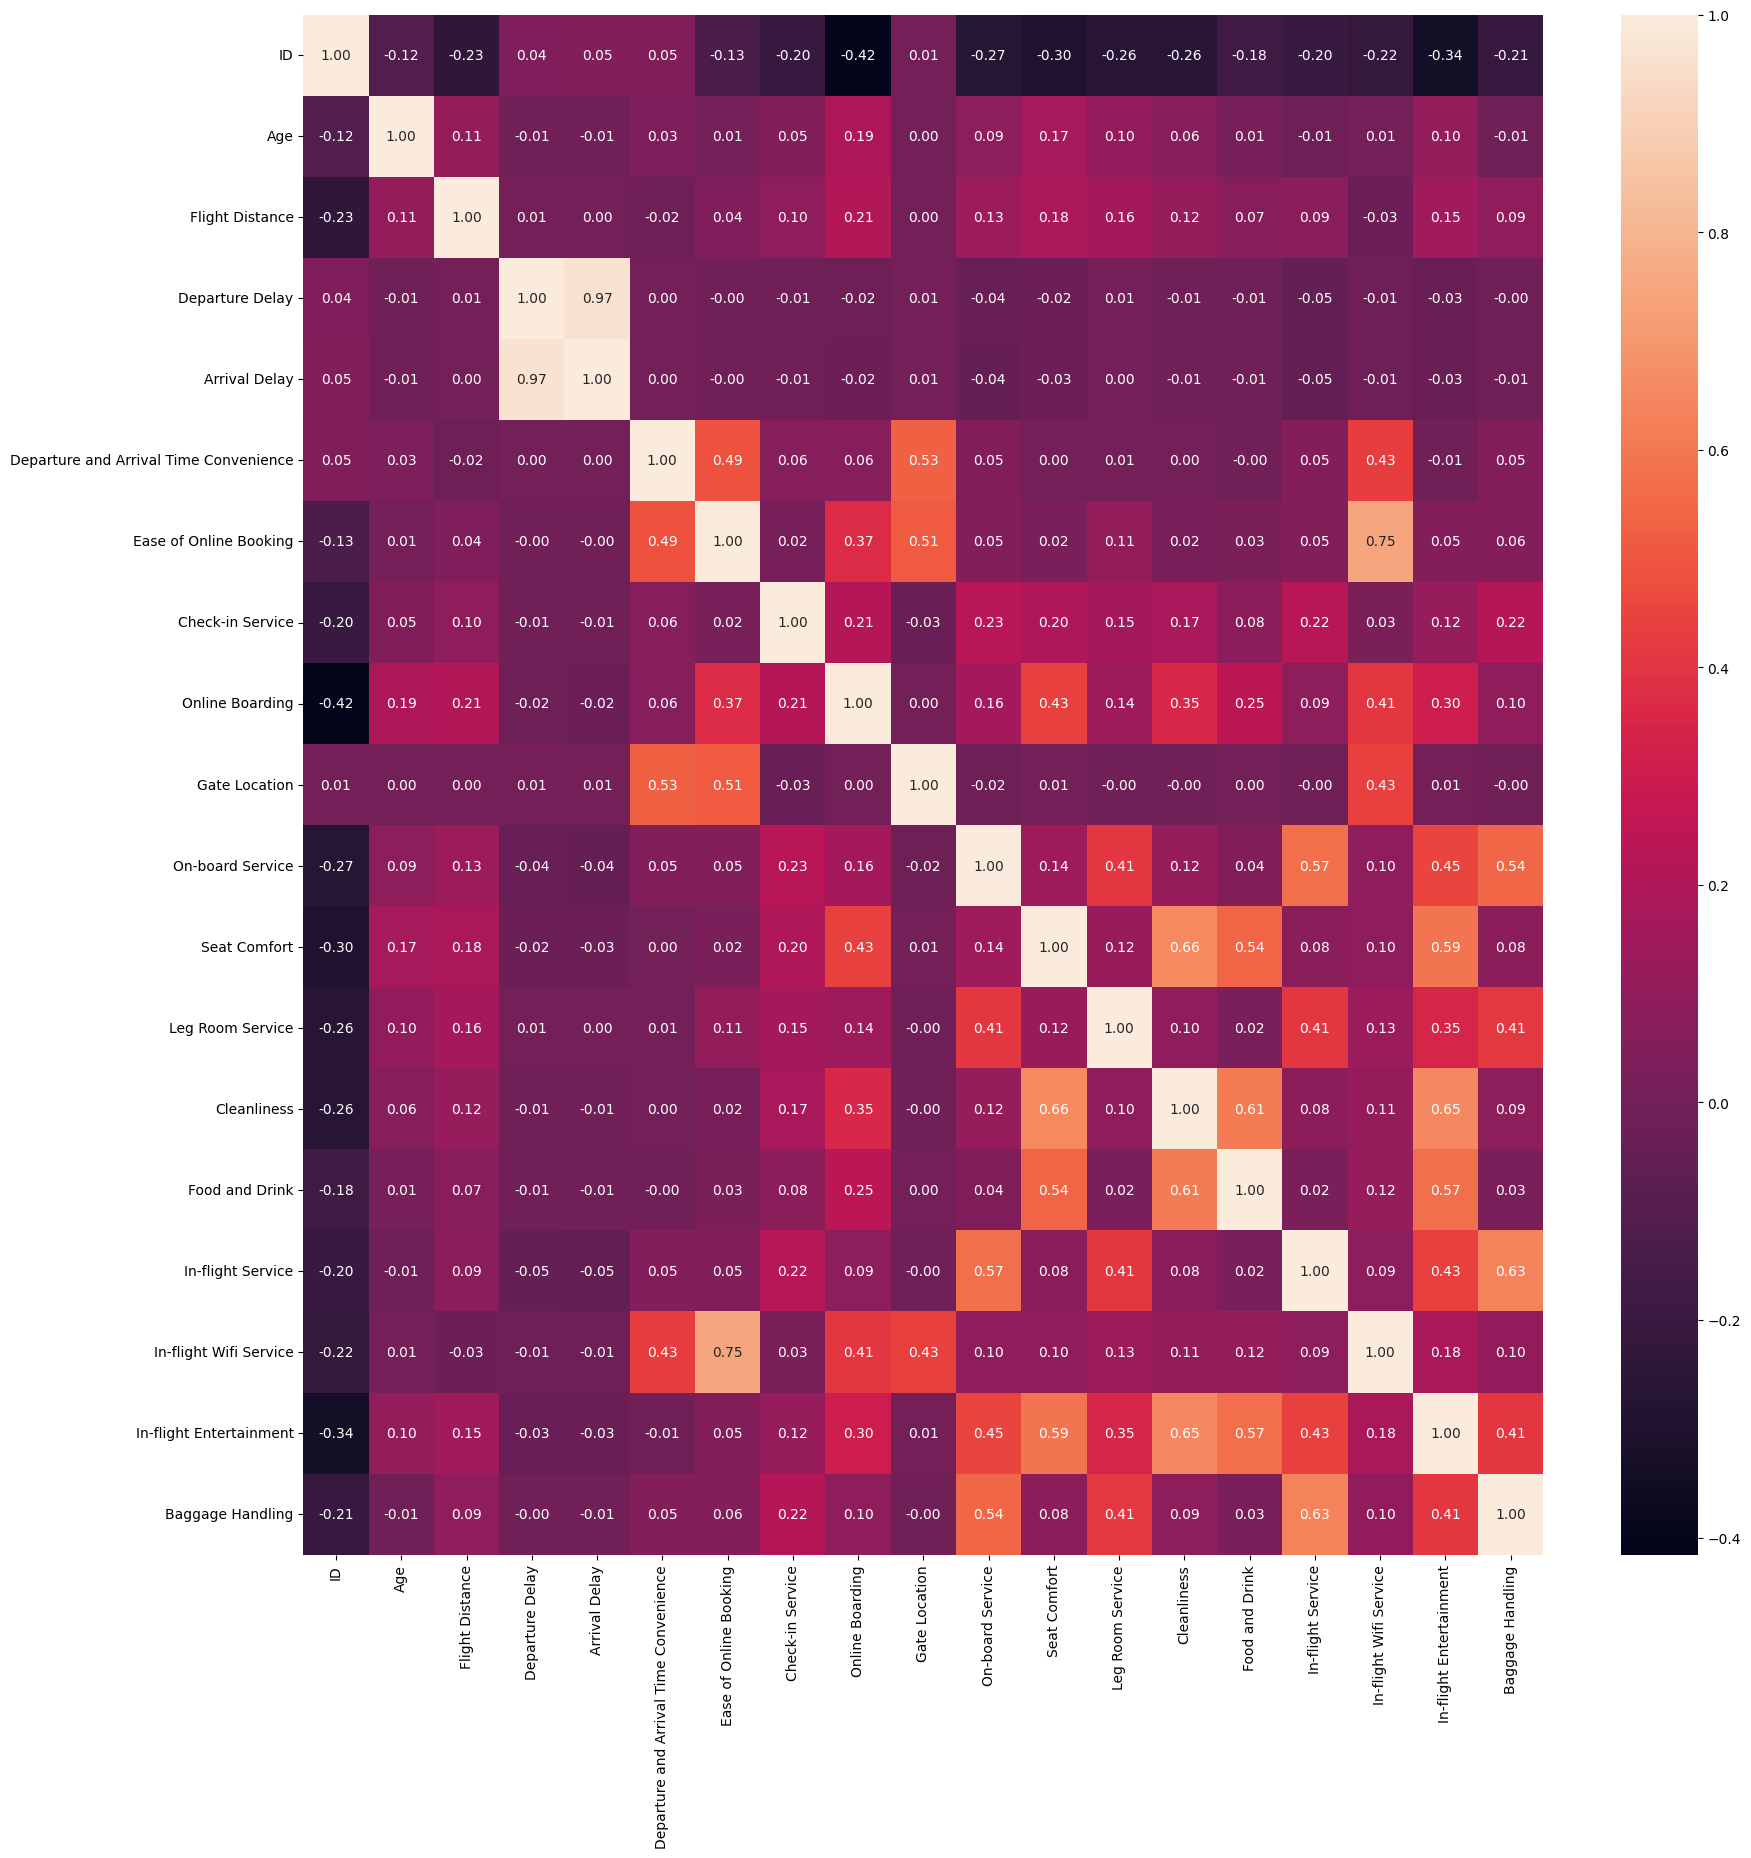

In [25]:
train_numeric = train_data.drop(train_data.select_dtypes(include=['object', 'category']).columns, axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(train_numeric.corr(), annot=True, fmt=".2f")

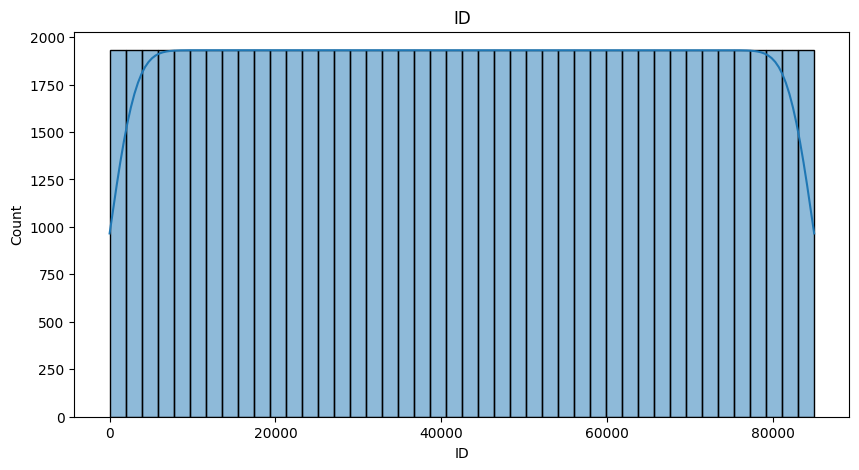

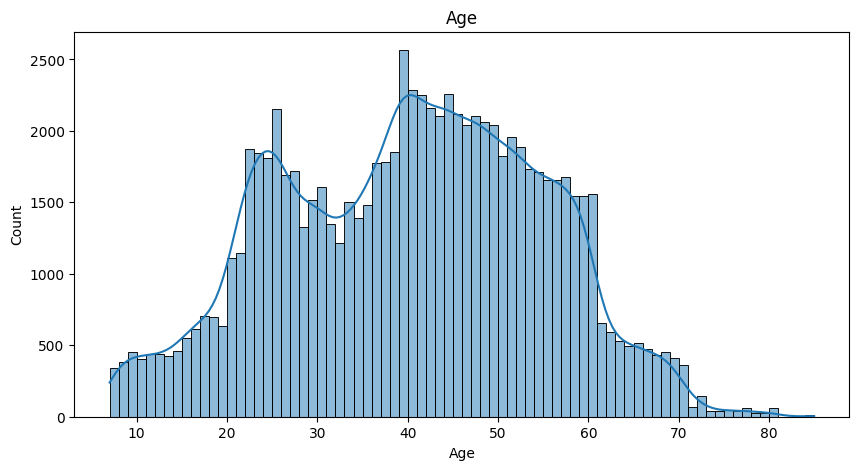

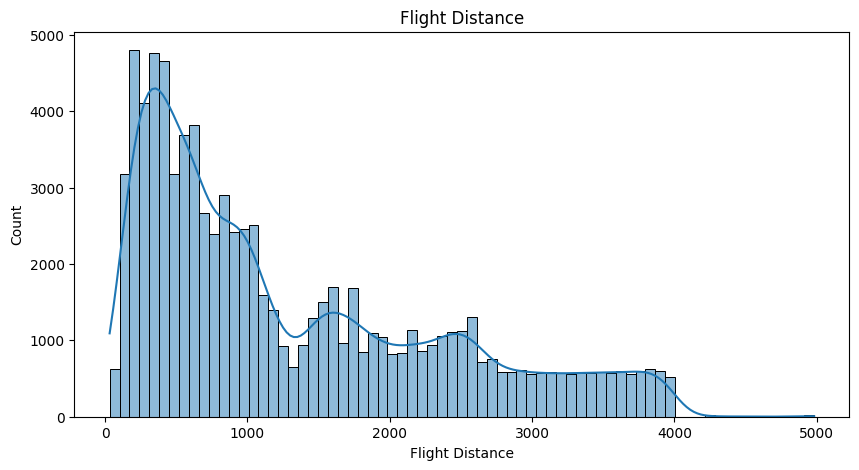

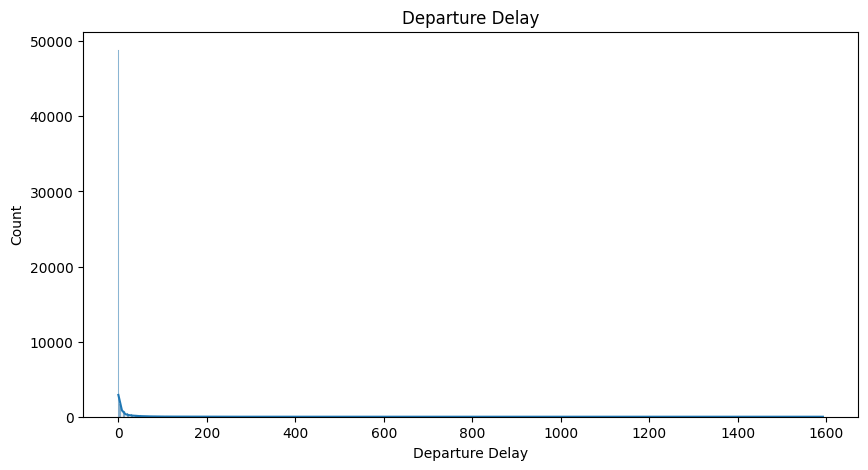

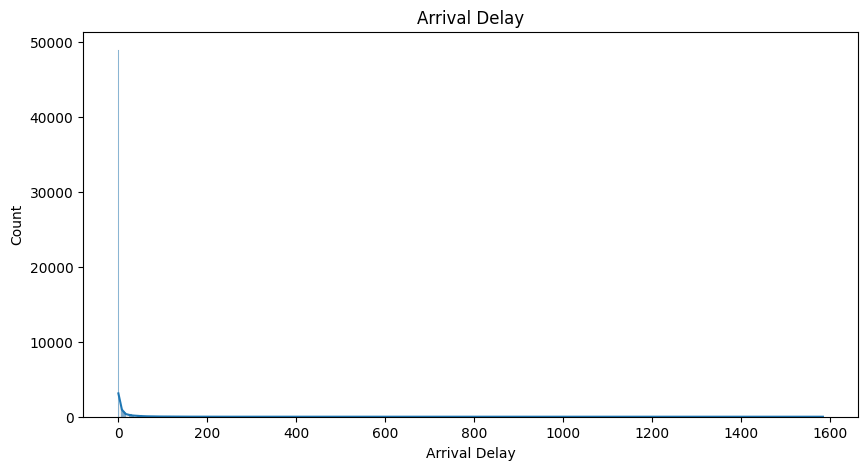

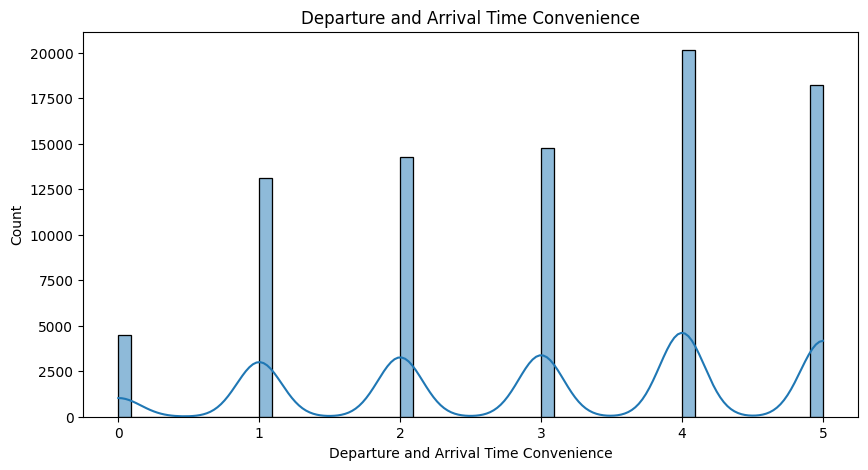

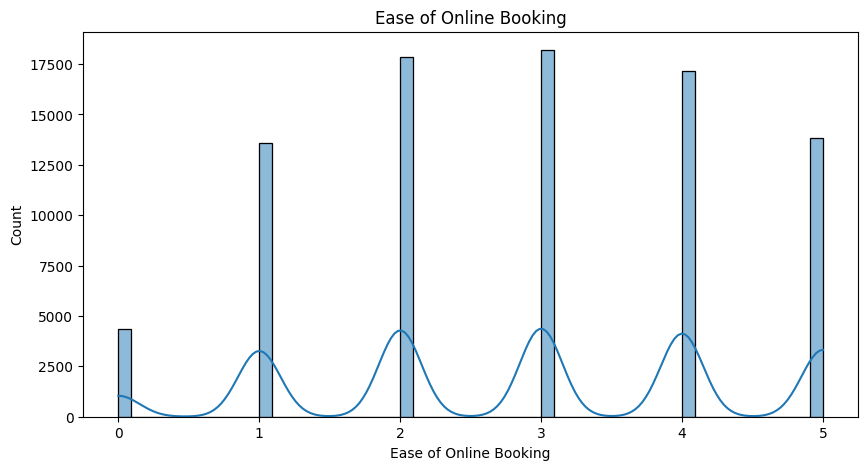

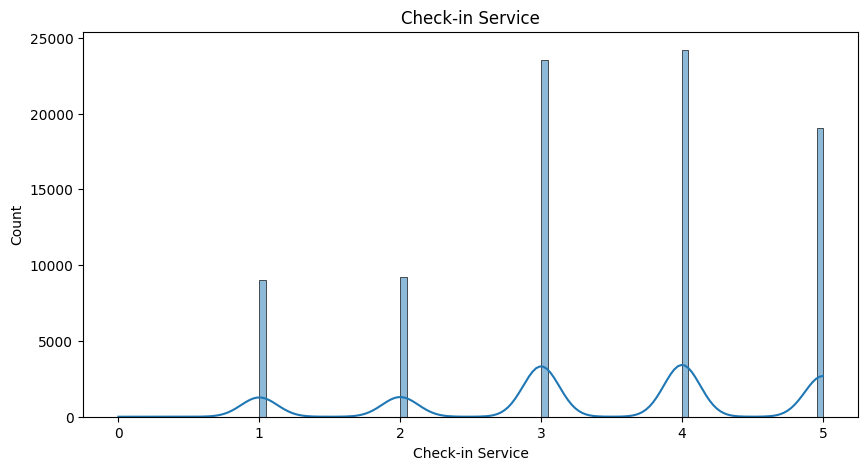

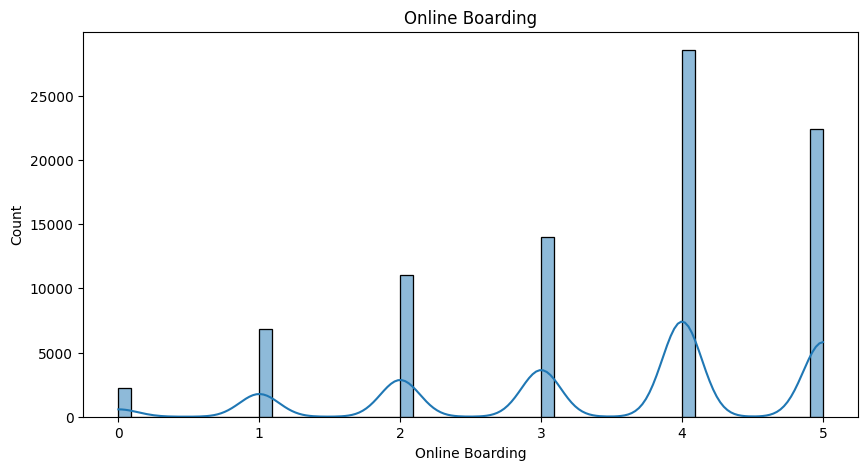

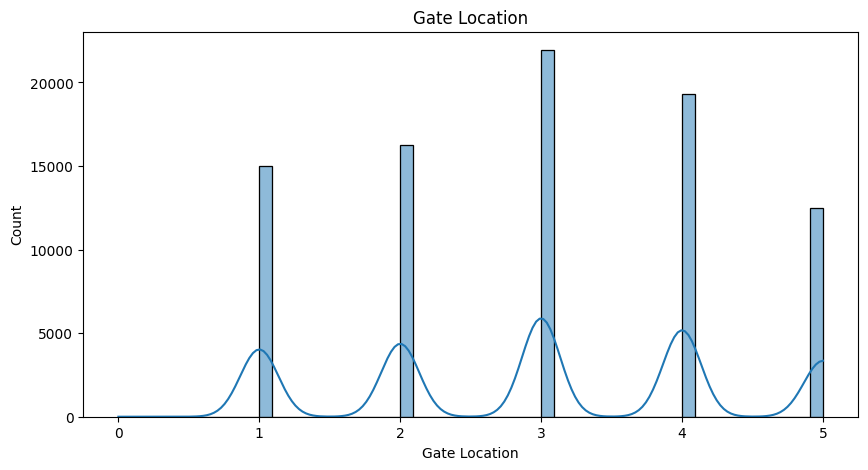

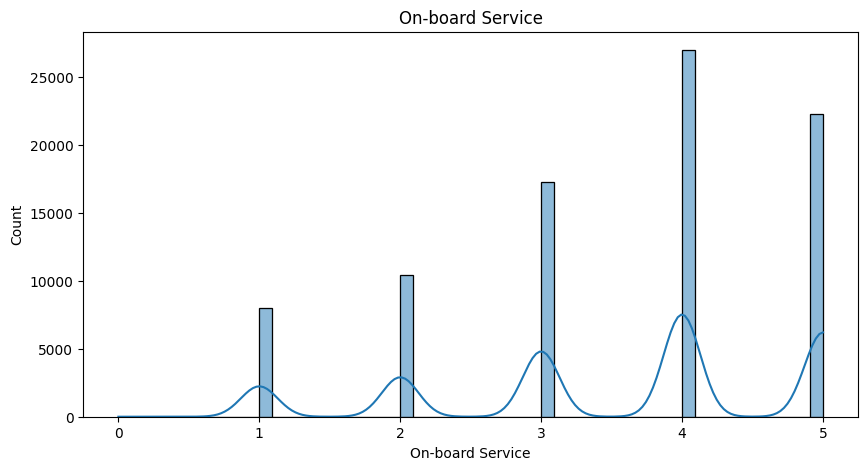

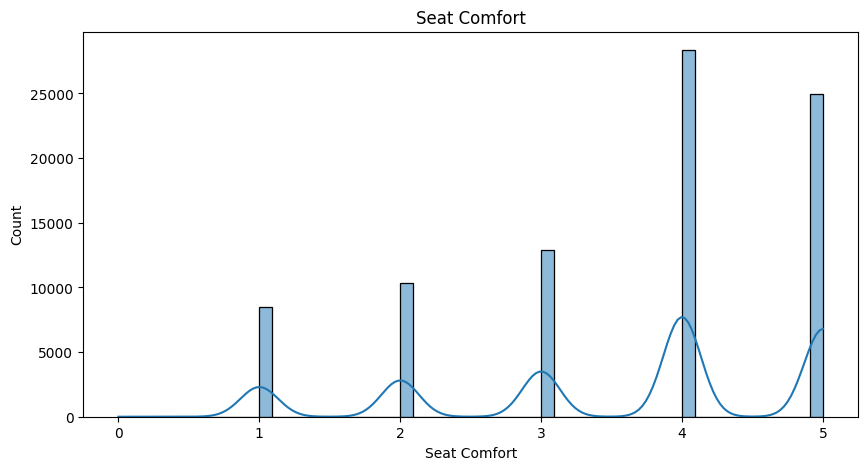

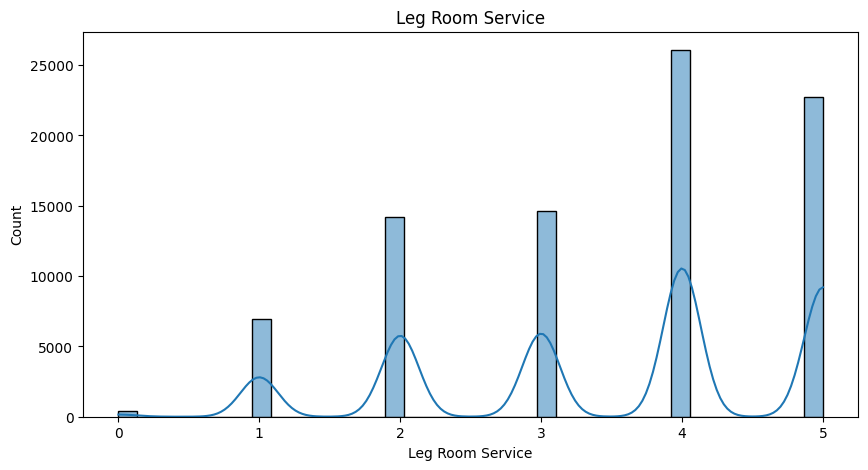

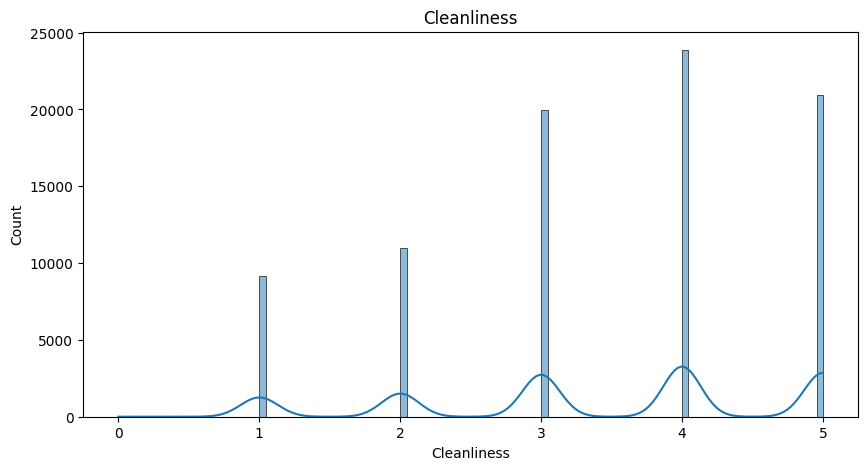

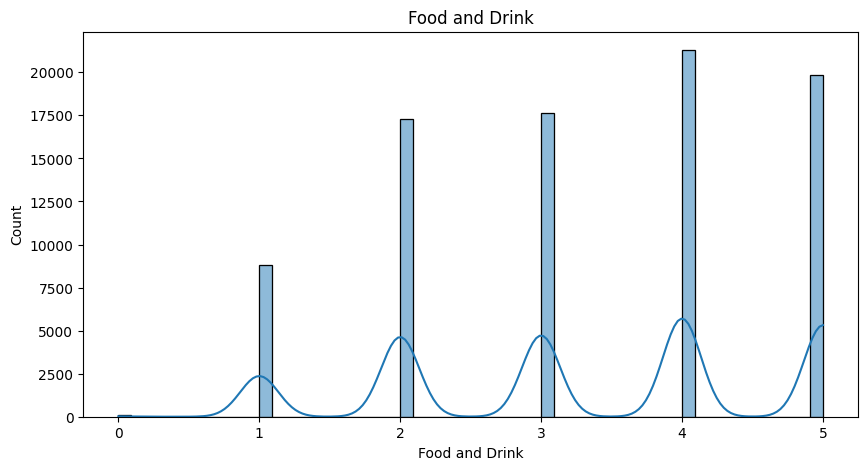

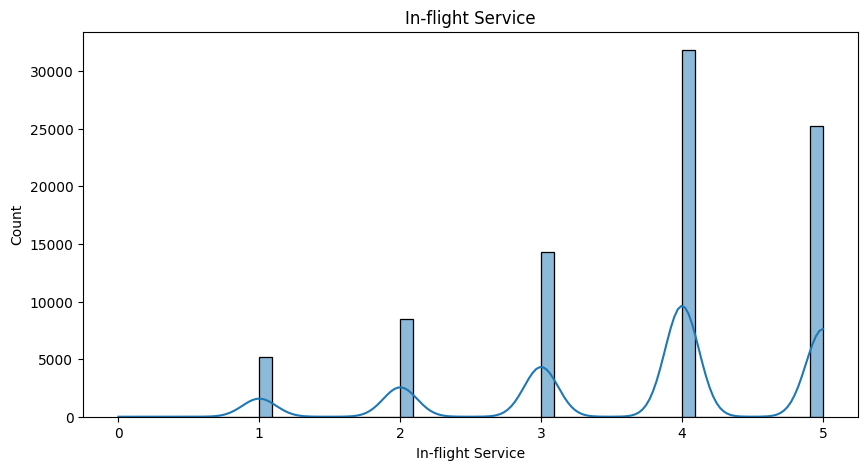

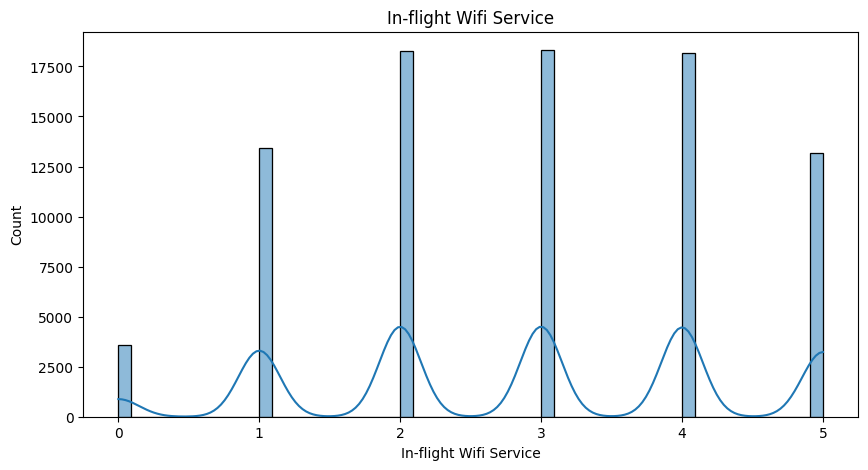

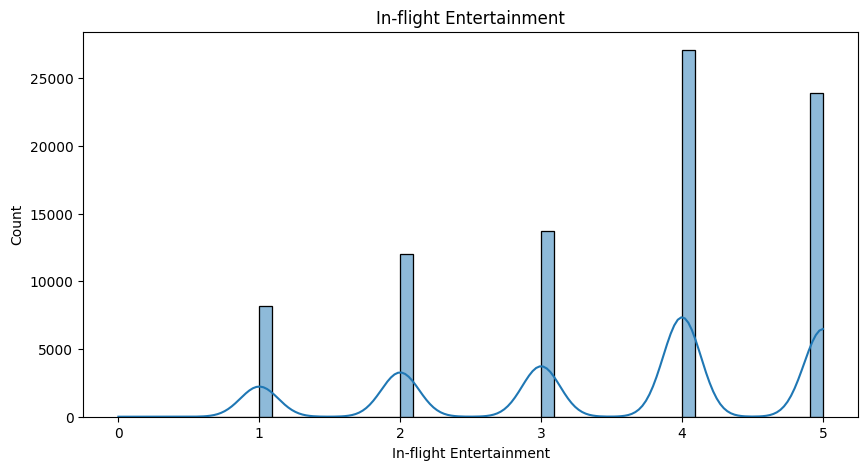

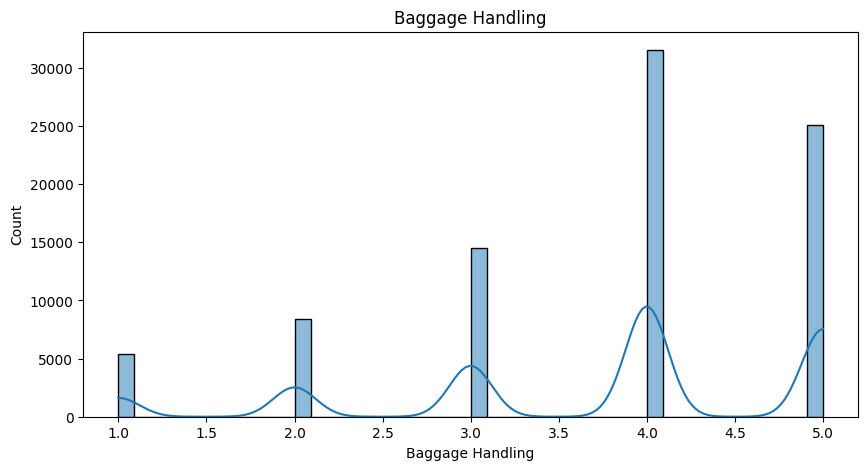

ValueError: Could not interpret value `satisfaction` for `hue`. An entry with this name does not appear in `data`.

In [38]:
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[column], kde=True)
    plt.title(column)
    plt.show()

for column in train_data.select_dtypes(include=['object']).columns:
    sns.countplot(data=train_data, x=column, hue='satisfaction')
    plt.title(column)
    plt.show()

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Departure Delay'}>],
       [<Axes: title={'center': 'Arrival Delay'}>,
        <Axes: title={'center': 'Departure and Arrival Time Convenience'}>,
        <Axes: title={'center': 'Ease of Online Booking'}>,
        <Axes: title={'center': 'Check-in Service'}>],
       [<Axes: title={'center': 'Online Boarding'}>,
        <Axes: title={'center': 'Gate Location'}>,
        <Axes: title={'center': 'On-board Service'}>,
        <Axes: title={'center': 'Seat Comfort'}>],
       [<Axes: title={'center': 'Leg Room Service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Food and Drink'}>,
        <Axes: title={'center': 'In-flight Service'}>],
       [<Axes: title={'center': 'In-flight Wifi Service'}>,
        <Axes: title={'center': 'In-flight Entertainment'}>,
        <Axes: title={'center': 'Bagg

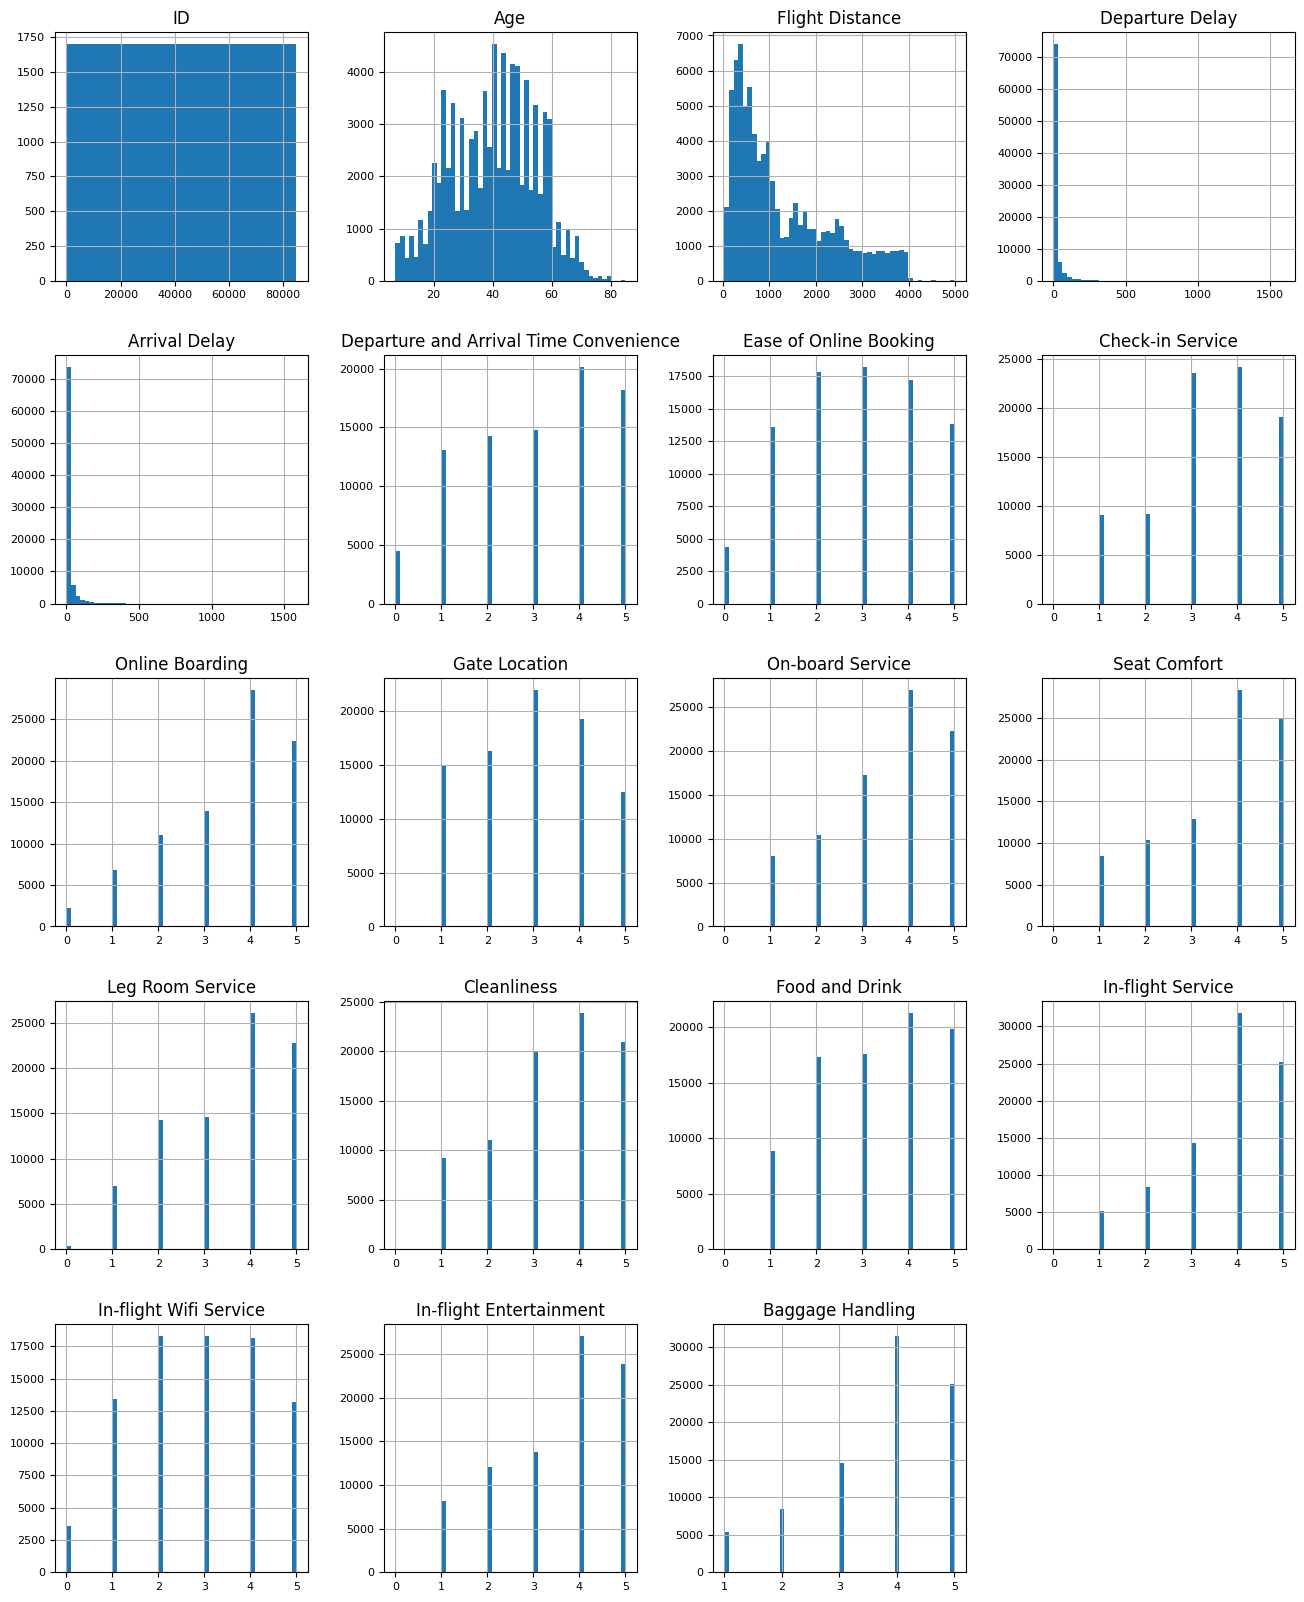

In [5]:
train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

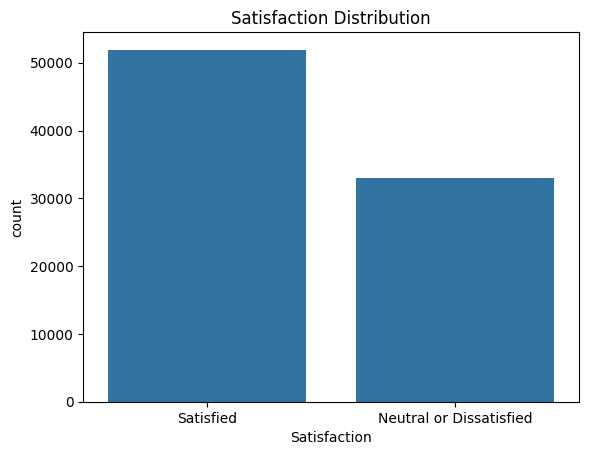

In [27]:
sns.countplot(x='Satisfaction', data=train_data)
plt.title('Satisfaction Distribution')
plt.show()

## Подготовка данных и **обработка пропусков**

In [171]:
print(train_data.columns)

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [33]:
train_data.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             262
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [34]:
test_data.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             131
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

> Заметим, что имеются пропуски в ***Arrival Delay*** (Задержка при прибытии)

> Можно заметить из матрицы корреляций, что есть сильная линейная ***зависимость*** между ***Arrival Delay*** и ***Departure Delay*** (Задержка при отправлении)

> Коэффициент корреляции равен ***0.97*** (из матрицы корреляций) 

### Проведу ***статистический тест*** для проверки значимости коэффициента корреляции

Для проверки значимости коэффициента корреляции можно использовать t-тест. Формула для вычисления t-статистики выглядит следующим образом:

t = r * sqrt(n - 2) / sqrt(1 - r²)

где:
- r — коэффициент корреляции
- n — размер выборки

#### Шаги для расчета:

1. Определите размер выборки (n). Это количество пар значений (Departure Delay и Arrival Delay).
2. Подставьте значения в формулу и вычислите t-статистику.
3. Сравните полученное значение t с критическим значением t из таблицы распределения t для n-2 степеней свободы и выбранного уровня значимости (например, 0.05).

#### Пример:

Допустим, размер выборки n = 100.

1. Коэффициент корреляции (r): 0.97
2. Размер выборки (n): 100

Вычисляем t-статистику:

- r² = 0.97² = 0.9409
- t = 0.97  sqrt(100 - 2) / sqrt(1 - 0.9409)
- t = 0.97  sqrt(98) / sqrt(0.0591)

Теперь, вычислим:

- sqrt(98) ≈ 9.899
- sqrt(0.0591) ≈ 0.243

Таким образом:

t = 0.97  9.899 / 0.243 ≈ 39.5

#### Теперь нужно сравнить t-статистику с критическим значением t:

- Для 98 степеней свободы (n - 2) при уровне значимости 0.05, таблица t-распределения дает критическое значение приблизительно 1.984.

Поскольку 39.5 >> 1.984, это свидетельствует о том, что полученное значение t значимо, и связь между задержкой при взлете и задержкой при посадке действительно сильная.

#### Вывод

С учетом того, что коэффициент корреляции равен 0.97 и тестирование значимости показывает, что связь между переменными значима, можно сделать вывод о том, что задержка при взлете предсказывает задержку при посадке с высокой степенью уверенности.

In [56]:
filtered_data = train_data[['Arrival Delay', 'Departure Delay']].dropna()
filtered_data[['Arrival Delay', 'Departure Delay']].head(20)

,Arrival Delay,Departure Delay
0,0.0,0
1,32.0,30
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,10
6,2.0,0
7,2.0,0
8,0.0,0
9,0.0,0


In [57]:
from scipy import stats

r = filtered_data['Arrival Delay'].corr(filtered_data['Departure Delay'])
n = len(train_data)

t_statistic = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

alpha = 0.05
df = n - 2 
t_critical = stats.t.ppf(1 - alpha/2, df)  # двусторонний тест

print(f"Коэффициент корреляции (r): {r:.4f}")
print(f"t-статистика: {t_statistic:.4f}")
print(f"Критическое значение t: {t_critical:.4f}")

if abs(t_statistic) > t_critical:
    print("Связь между переменными значима.")
else:
    print("Связь между переменными не значима.")

Коэффициент корреляции (r): 0.9659
t-статистика: 1086.7625
Критическое значение t: 1.9600
Связь между переменными значима.


In [61]:
X = filtered_data[['Departure Delay']] 
y = filtered_data['Arrival Delay'] 

model = LinearRegression()
model.fit(X, y)

a = model.intercept_ 
b = model.coef_[0]  

print(f"Уравнение модели: Arrival Delay = {a:.4f} + {b:.4f} * Departure Delay")

Уравнение модели: Arrival Delay = 0.6229 + 0.9787 * Departure Delay


In [84]:
train_data['Arrival Delay'] = np.where(
    train_data['Arrival Delay'].isna(),
    a + b * train_data['Departure Delay'],
    train_data['Arrival Delay']
)

test_data['Arrival Delay'] = np.where(
    test_data['Arrival Delay'].isna(),
    a + b * test_data['Departure Delay'],
    test_data['Arrival Delay']
)

In [85]:
train_data.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [86]:
for col in cat_cols:
    values = list(train_data[col].unique())[::-1]
    encoding = {key: value for value, key in enumerate(values)}
    train_data[col] = train_data[col].map(encoding)
    print(encoding)

    if col == "Satisfaction":
        continue

    test_data[col] = test_data[col].map(encoding)

X, Y = train_data.drop("Satisfaction", axis=1), train_data["Satisfaction"]

{'Female': 0, 'Male': 1}
{'First-time': 0, 'Returning': 1}
{'Personal': 0, 'Business': 1}
{'Economy Plus': 0, 'Economy': 1, 'Business': 2}
{'Neutral or Dissatisfied': 0, 'Satisfied': 1}


## Построение модели

In [89]:
poly = PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X.drop(columns=["ID"]))
X_test = poly.transform(test_data.drop(columns=["ID"]))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


x_train, x_valid, y_train, y_valid = train_test_split(X_scaled, Y, test_size=0.20)

In [92]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
preds = lr.predict(x_valid)
print(f1_score(y_valid, preds, average="micro"))

0.9359185594915853


In [105]:
out0 = lr.predict(X_test_scaled)
pd.DataFrame(out0).describe()

,0
count,44913.000000
mean,0.162002
std,0.368457
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [97]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6543
           1       0.95      0.94      0.95     10451

    accuracy                           0.94     16994
   macro avg       0.93      0.93      0.93     16994
weighted avg       0.94      0.94      0.94     16994



In [110]:
out00 = pd.DataFrame({"ID": test_data["ID"], "Satisfaction": out0})

out00.describe()

,ID,Satisfaction
count,44913.000000,44913.000000
mean,107423.000000,0.162002
std,12965.410657,0.368457
min,84967.000000,0.000000
25%,96195.000000,0.000000
50%,107423.000000,0.000000
75%,118651.000000,0.000000
max,129879.000000,1.000000


In [114]:
out00.to_csv("000dzzzzzz4.csv", index=False)

Лучший результат пока этот

### Следующая модель

In [100]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_valid)
print(f1_score(y_valid, y_pred, average="micro"))

0.9413322349064376


In [106]:
out1 = tree.predict(X_test_scaled)
pd.DataFrame(out1).describe()

,0
count,44913.000000
mean,0.164496
std,0.370729
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [108]:
out = pd.DataFrame({"ID": test_data["ID"], "Satisfaction": out1})

out.describe()

,ID,Satisfaction
count,44913.000000,44913.000000
mean,107423.000000,0.164496
std,12965.410657,0.370729
min,84967.000000,0.000000
25%,96195.000000,0.000000
50%,107423.000000,0.000000
75%,118651.000000,0.000000
max,129879.000000,1.000000


In [109]:
out.to_csv("dzzzzzz4.csv", index=False)

### Ещё одна модель:

In [116]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(
    random_seed=42,
    loss_function="Logloss",
    custom_loss=['F1', 'Accuracy']
)

cb_clf.fit(
    x_train, y_train,
    eval_set=(x_valid, y_valid),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [117]:
cb_clf.best_score_["validation"]["F1"]

0.9665802362431576

In [118]:
preds = cb_clf.predict(X_test_scaled)

In [120]:
out123 = pd.DataFrame({"ID": test_data["ID"], "Satisfaction": preds})

out123.describe()

,ID,Satisfaction
count,44913.000000,44913.000000
mean,107423.000000,0.139692
std,12965.410657,0.346671
min,84967.000000,0.000000
25%,96195.000000,0.000000
50%,107423.000000,0.000000
75%,118651.000000,0.000000
max,129879.000000,1.000000


In [121]:
out123.to_csv("outfinal.csv", index=False)